# **Assignment: Phase Diagram and Out-of-Equilibrium Dynamics**

#### **Author:** Guillermo Abad López

#### **Date:** 17 Feb, 2025
---

## **I. Introduction**
#### **We will study the phase diagram and the out-of-equilibrium dynamics of a paradigmatic spin model. The model is defined on an open chain of spin-1/2 constituents of length $L$. The Hamiltonian is given by [1]:**

#### $$H(p,\lambda)=-\sum_{i}\left[\sigma^{z}_{i}\sigma^{z}_{i+1}+\lambda\sigma^{z}_{i}+p \left(\sigma^{z}_{i}\sigma^{z}_{i+2}+\lambda\sigma^{x}_{i}\sigma^{x}_{i+1}\right)\right].$$

#### **Key properties of the Hamiltonian:**

1. **If $p=0$, the model reduces to the standard transverse-field Ising model.**

2. **If $\lambda=1$ and $p\to\infty$, the Ising part becomes negligible, and the model is more complicated.**

3. **For $p\neq 0$, the Hamiltonian includes next-nearest-neighbor interactions.**


#### **The goal of this assignment is to analyze the phase diagram of the model in the $(p, \lambda)$ plane and to study its out-of-equilibrium dynamics. We will focus on values $p \leq 1$ to stay close to the transverse field Ising model (whose properties you can obtain by setting p = 0).**


----


## **II. Phase Diagram (5 points)**
#### **Using $TeMPy$ [2, 3], perform the following tasks:**

### 1. **Define the model in $TeMPy$** (2 points).

 In the code below, we define a new model class (here called `ExtendedIsingModel`) that extends Tenpy’s `SpinChainNNN`.

In [420]:
# ruff: noqa: RUF002, RUF003, T201, CPY001

import warnings

import numpy as np

warnings.filterwarnings("ignore", message="unused option", category=UserWarning)

from extended_ising_model import ExtendedIsingModel, ExtendedIsingModelSweeper

**Lattice & Sites:**

We create a one-dimensional chain of length L, where each site is a spin‑1/2 Hilbert space.

**Hamiltonian Terms:**
- The nearest-neighbor ZZ coupling is added for every adjacent pair 
$(i, i+1)$ with a coefficient $−1$. 
- The onsite field is implemented by adding $− \lambda$ times $\sigma^z$ on every site.
- The next-nearest-neighbor ZZ coupling couples sites $i$ and $i+2$ with strength $−p$.
- The XX coupling (with strength $−p\lambda$) is added between sites $i$ and $i+1$.

**Parameter Choices:**

The model parameters are provided via a dictionary. With default values being:

- `L (int)`:  Length of the chain in terms of `site.GroupedSite`, i.e. we have ``2*L`` spin sites. Defaults to 10.

- `S (float)`: The 2S+1 local states range from m = -S, -S+1, ... +S, can take values: {0.5, 1, 1.5, 2, ...}. Defaults to 0.5.

- `p (float)`: The next-nearest neighbor strength for sigma_z and close neighbor sigma_x interactions; p=0 gives the transverse field Ising model. Defaults to 0.0.

- `lmbd (float)`: The field strength of Z, affecting also the close neighbor sigma_x interactions. Defaults to 1.0.

- `bc_MPS (str)`: The boundary conditions for the MPS simulation. Defaults to "infinite".

- `conserve (str | None)`: What should be conserved:  'best' | 'Sz' | 'parity' | None. Defaults to None.

### 2. **Characterize the phase diagram using an infinite MPS ansatz** (2 points):

#### **(a) For each $(p,\lambda)$ point, run simulations with bond dimensions $D=16$ and $D=32$.**


#### Executions:
---

In the cells below we execute several `dmrg`'s to find the ground state of the system, which will be used for the posterior plots.

(In some cases I might advance some info asked later, like `D=64`, since the simus are the same)

In [ ]:
# Execute the sweep with this sweep intervals:
Ds = [32, 64]
p_values = np.linspace(0, 2, 10)
lmbd_values = np.linspace(0, 2, 20)

results_E, results_xi, results_approx_Xi, results_S = ExtendedIsingModelSweeper.sweep_dmrg(
    Ds=Ds, p_values=p_values, lmbd_values=lmbd_values, init_state="up"
)

In [30]:
# Execute the sweep with this sweep intervals:
Ds = [16, 32, 64]
p_values = np.linspace(0, 5, 10)
lmbd_values = np.linspace(0, 2, 20)

results_E2, results_x2i, results_S2 = ExtendedIsingModelSweeper.sweep_dmrg(
    Ds=Ds, p_values=p_values, lmbd_values=lmbd_values, init_state="up"
)

/var/folders/nv/vf2cm8nn6jjd3h0txmrbrbvh0000gn/T/ipykernel_99562/398336218.py:60: RuntimeWarning: divide by zero encountered in log
  return -1.0 / np.log(abs(lambda2))  # xi
/var/folders/nv/vf2cm8nn6jjd3h0txmrbrbvh0000gn/T/ipykernel_99562/398336218.py:60: RuntimeWarning: divide by zero encountered in log
  return -1.0 / np.log(abs(lambda2))  # xi
/var/folders/nv/vf2cm8nn6jjd3h0txmrbrbvh0000gn/T/ipykernel_99562/398336218.py:60: RuntimeWarning: divide by zero encountered in log
  return -1.0 / np.log(abs(lambda2))  # xi
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.295964
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.999345
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.999042
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.000000
poorly conditioned H matrix in KrylovBased! |psi_0| = 1.414214
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.999658
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.327580
poorly conditioned H matrix in Kry

In [39]:
# Example of executing a sweep with this Sweep Class:
Ds = [2, 4, 8, 16, 32, 64]
p_values = np.linspace(0, 2, 10)
lmbd_values = np.linspace(0, 2, 20)

results_E3, results_xi3, results_S3 = ExtendedIsingModelSweeper.sweep_dmrg(
    Ds=Ds, p_values=p_values, lmbd_values=lmbd_values, init_state="up"
)

poorly conditioned H matrix in KrylovBased! |psi_0| = 0.295964
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.999345
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.999042
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.000000
poorly conditioned H matrix in KrylovBased! |psi_0| = 1.414214
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.999658
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.327580
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.744128
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.999990
poorly conditioned H matrix in KrylovBased! |psi_0| = 1.138666
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.447100
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.999922
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.999708
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.999853
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.997156
poorly conditioned H matrix in KrylovBased! |psi_0| = 0

In [ ]:
# Execute the sweep with this sweep intervals:
Ds = [32, 64]
p_values = np.linspace(0, 1, 10)
lmbd_values = np.linspace(0.9, 1.1, 20)

results_E4, results_xi4, results_S4 = ExtendedIsingModelSweeper.sweep_dmrg(
    Ds=Ds, p_values=p_values, lmbd_values=lmbd_values, init_state="up"
)

In [ ]:
# Execute the sweep with this sweep intervals:
Ds = [1, 2, 3, 4, 5, 8, 10, 16, 32]
p_values = [1]
lmbd_values = np.linspace(0.9, 1.1, 20)

results_E5, results_xi5, results_S5 = ExtendedIsingModelSweeper.sweep_dmrg(
    Ds=Ds, p_values=p_values, lmbd_values=lmbd_values, init_state="up"
)

final DMRG state not in canonical form up to norm_tol_final=1.00e-10: norm_err=1.43e-10, calling psi.canonical_form()
final DMRG state not in canonical form up to norm_tol_final=1.00e-10: norm_err=1.03e-10, calling psi.canonical_form()
final DMRG state not in canonical form up to norm_tol_final=1.00e-10: norm_err=5.98e-10, calling psi.canonical_form()
final DMRG state not in canonical form up to norm_tol_final=1.00e-10: norm_err=4.26e-10, calling psi.canonical_form()
final DMRG state not in canonical form up to norm_tol_final=1.00e-10: norm_err=2.55e-09, calling psi.canonical_form()
final DMRG state not in canonical form up to norm_tol_final=1.00e-10: norm_err=1.69e-09, calling psi.canonical_form()
final DMRG state not in canonical form up to norm_tol_final=1.00e-10: norm_err=1.11e-08, calling psi.canonical_form()
final DMRG state not in canonical form up to norm_tol_final=1.00e-10: norm_err=6.73e-09, calling psi.canonical_form()
final DMRG state not in canonical form up to norm_tol_fi

In [ ]:
# Execute the sweep with this sweep intervals:
Ds = [1, 2, 3, 4, 5, 8, 10, 16, 32, 64]
p_values = [1]
lmbd_values = np.linspace(0.9, 1.1, 50)

results_E6, results_xi6, results_S6 = ExtendedIsingModelSweeper.sweep_dmrg(
    Ds=Ds, p_values=p_values, lmbd_values=lmbd_values, init_state="plus"
)

final DMRG state not in canonical form up to norm_tol_final=1.00e-10: norm_err=1.03e-09, calling psi.canonical_form()
canonical_form_infinite: project to significantly smaller chi
canonical_form_infinite: project to significantly smaller chi
canonical_form_infinite: project to significantly smaller chi
canonical_form_infinite: project to significantly smaller chi
canonical_form_infinite: project to significantly smaller chi
canonical_form_infinite: project to significantly smaller chi
canonical_form_infinite: project to significantly smaller chi
canonical_form_infinite: project to significantly smaller chi
canonical_form_infinite: project to significantly smaller chi
canonical_form_infinite: project to significantly smaller chi
canonical_form_infinite: project to significantly smaller chi
canonical_form_infinite: project to significantly smaller chi
canonical_form_infinite: project to significantly smaller chi
canonical_form_infinite: project to significantly smaller chi
canonical_form

In [222]:
# Execute the sweep with this sweep intervals:
Ds = [1, 2, 3, 4, 5, 8, 10, 16, 32, 64]
p_values = [1]
lmbd_values = np.linspace(0.9, 1.1, 40)

results_E6, results_xi6, results_S6 = ExtendedIsingModelSweeper.sweep_dmrg(
    Ds=Ds, p_values=p_values, lmbd_values=lmbd_values, init_state="up"
)

final DMRG state not in canonical form up to norm_tol_final=1.00e-10: norm_err=1.33e-10, calling psi.canonical_form()
final DMRG state not in canonical form up to norm_tol_final=1.00e-10: norm_err=2.67e-10, calling psi.canonical_form()
final DMRG state not in canonical form up to norm_tol_final=1.00e-10: norm_err=5.36e-10, calling psi.canonical_form()
final DMRG state not in canonical form up to norm_tol_final=1.00e-10: norm_err=1.86e-10, calling psi.canonical_form()
final DMRG state not in canonical form up to norm_tol_final=1.00e-10: norm_err=1.08e-09, calling psi.canonical_form()
final DMRG state not in canonical form up to norm_tol_final=1.00e-10: norm_err=3.69e-10, calling psi.canonical_form()
final DMRG state not in canonical form up to norm_tol_final=1.00e-10: norm_err=2.20e-09, calling psi.canonical_form()
final DMRG state not in canonical form up to norm_tol_final=1.00e-10: norm_err=7.25e-10, calling psi.canonical_form()
final DMRG state not in canonical form up to norm_tol_fi

In [322]:
# Execute the sweep with this sweep intervals:
Ds = [1, 2, 3, 4, 5, 8, 10, 16, 32, 64]
p_values = [1]
lmbd_values = np.linspace(0.6, 1.4, 50)

results_E6, results_xi6, results_S6 = ExtendedIsingModelSweeper.sweep_dmrg(
    Ds=Ds, p_values=p_values, lmbd_values=lmbd_values, init_state="up"
)


final DMRG state not in canonical form up to norm_tol_final=1.00e-10: norm_err=3.01e-10, calling psi.canonical_form()
final DMRG state not in canonical form up to norm_tol_final=1.00e-10: norm_err=4.70e-10, calling psi.canonical_form()
final DMRG state not in canonical form up to norm_tol_final=1.00e-10: norm_err=2.84e-09, calling psi.canonical_form()
final DMRG state not in canonical form up to norm_tol_final=1.00e-10: norm_err=3.99e-09, calling psi.canonical_form()
final DMRG state not in canonical form up to norm_tol_final=1.00e-10: norm_err=1.18e-08, calling psi.canonical_form()
final DMRG state not in canonical form up to norm_tol_final=1.00e-10: norm_err=1.93e-10, calling psi.canonical_form()
final DMRG state not in canonical form up to norm_tol_final=1.00e-10: norm_err=1.51e-09, calling psi.canonical_form()
final DMRG state not in canonical form up to norm_tol_final=1.00e-10: norm_err=1.45e-10, calling psi.canonical_form()
final DMRG state not in canonical form up to norm_tol_fi

In [352]:
# Execute the sweep with this sweep intervals:
Ds = [1, 2, 3, 4, 5, 8, 10, 16, 32, 64]
p_values = [1]
lmbd_values = np.linspace(0.0, 2.0, 50)

results_E7, results_xi7, results_S7 = ExtendedIsingModelSweeper.sweep_dmrg(
    Ds=Ds, p_values=p_values, lmbd_values=lmbd_values, init_state="up"
)

poorly conditioned H matrix in KrylovBased! |psi_0| = 1.202608
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.999927
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.999983
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.999886
poorly conditioned H matrix in KrylovBased! |psi_0| = 1.376498
poorly conditioned H matrix in KrylovBased! |psi_0| = 1.376005
poorly conditioned H matrix in KrylovBased! |psi_0| = 1.376204
poorly conditioned H matrix in KrylovBased! |psi_0| = 1.403557
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.667206
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.999963
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.999913
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.999964
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.330454
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.934053
final DMRG state not in canonical form up to norm_tol_final=1.00e-10: norm_err=1.48e-09, calling psi.canonical_form()


In [355]:
# Execute the sweep with this sweep intervals:
Ds = [2, 4, 8, 16, 32, 64]
p_values = np.linspace(0, 2, 10)
lmbd_values = np.linspace(0, 2, 20)

results_E8, results_xi8, results_S8 = ExtendedIsingModelSweeper.sweep_dmrg(
    Ds=Ds, p_values=p_values, lmbd_values=lmbd_values, init_state="up"
)

poorly conditioned H matrix in KrylovBased! |psi_0| = 0.176787
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.999971
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.999976
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.999763
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.999970
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.999980
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.999922
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.999899
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.999255
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.101145
poorly conditioned H matrix in KrylovBased! |psi_0| = 1.000328
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.999857
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.999941
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.999858
poorly conditioned H matrix in KrylovBased! |psi_0| = 0.333860
poorly conditioned H matrix in KrylovBased! |psi_0| = 0

In [365]:
# Execute the sweep with this sweep intervals:
Ds = [1, 2, 3, 4, 5, 8, 10, 16, 32, 64]
p_values = [1]
lmbd_values = np.linspace(0.9, 1.1, 40)

results_E9, results_xi9, results_S9 = ExtendedIsingModelSweeper.sweep_dmrg(
    Ds=Ds, p_values=p_values, lmbd_values=lmbd_values, init_state="up"
)

final DMRG state not in canonical form up to norm_tol_final=1.00e-10: norm_err=1.14e-10, calling psi.canonical_form()
final DMRG state not in canonical form up to norm_tol_final=1.00e-10: norm_err=5.95e-09, calling psi.canonical_form()
final DMRG state not in canonical form up to norm_tol_final=1.00e-10: norm_err=6.52e-10, calling psi.canonical_form()
final DMRG state not in canonical form up to norm_tol_final=1.00e-10: norm_err=8.64e-10, calling psi.canonical_form()
final DMRG state not in canonical form up to norm_tol_final=1.00e-10: norm_err=3.35e-09, calling psi.canonical_form()
final DMRG state not in canonical form up to norm_tol_final=1.00e-10: norm_err=6.30e-10, calling psi.canonical_form()
final DMRG state not in canonical form up to norm_tol_final=1.00e-10: norm_err=1.44e-10, calling psi.canonical_form()
final DMRG state not in canonical form up to norm_tol_final=1.00e-10: norm_err=7.57e-09, calling psi.canonical_form()
final DMRG state not in canonical form up to norm_tol_fi

#### Post-process results to vizualize `Energy` vs `p` and `lambda`
---

In [77]:
# Plot results with these sweep intervals:
ExtendedIsingModelSweeper.plot_sweep_vs_p_and_lambda(results_E, "Energy", "Energy", Ds, p_values, lmbd_values)

In [ ]:
# Plot results with these sweep intervals:
Ds = [16, 32, 64]
p_values = np.linspace(0, 5, 10)
lmbd_values = np.linspace(0, 2, 20)
ExtendedIsingModelSweeper.plot_sweep_vs_p_and_lambda(
    results_E2, "Energy", "Energy", Ds, p_values, lmbd_values, "viridis"
)

#### `P` and `lambda` from 0->2, with `D=2,4,8,16,32,64`:

In [ ]:
# Exemple of plotting the results with these sweep interval, using the Sweep Class:
Ds = [2, 4, 8, 16, 32, 64]
p_values = np.linspace(0, 2, 10)
lmbd_values = np.linspace(0.6, 2, 20)

ExtendedIsingModelSweeper.plot_sweep_vs_p_and_lambda(
    results_E3, "Energy", "Energy", Ds, p_values, lmbd_values, "viridis"
)

In [361]:
# Plot results with these sweep intervals:
Ds = [2, 4, 8, 16, 32, 64]
p_values = np.linspace(0, 2, 10)
lmbd_values = np.linspace(0, 2, 20)

ExtendedIsingModelSweeper.plot_sweep_vs_p_and_lambda(
    results_E8, "Energy", "Energy", Ds, p_values, lmbd_values, "viridis"
)

#### Doing more Zoom around `lambda=1`, with better axis granularity for `D=32, 64`::

In [ ]:
# Plot results with these sweep intervals:
Ds = [32, 64]
p_values = np.linspace(0, 1, 10)
lmbd_values = np.linspace(0.9, 1.1, 20)
ExtendedIsingModelSweeper.plot_sweep_vs_p_and_lambda(
    results_E4, "Energy", "Energy", Ds, p_values, lmbd_values, "viridis"
)

#### **(b) Compute and plot correlation length $\xi$ vs. $p$ and $\lambda$ for both bond dimensions. Identify regions where $D$ is insufficient to capture the physics.**

#### Same Post-process of results, but this time to vizualize the `correlation lenght` vs `p` and `lambda`
---

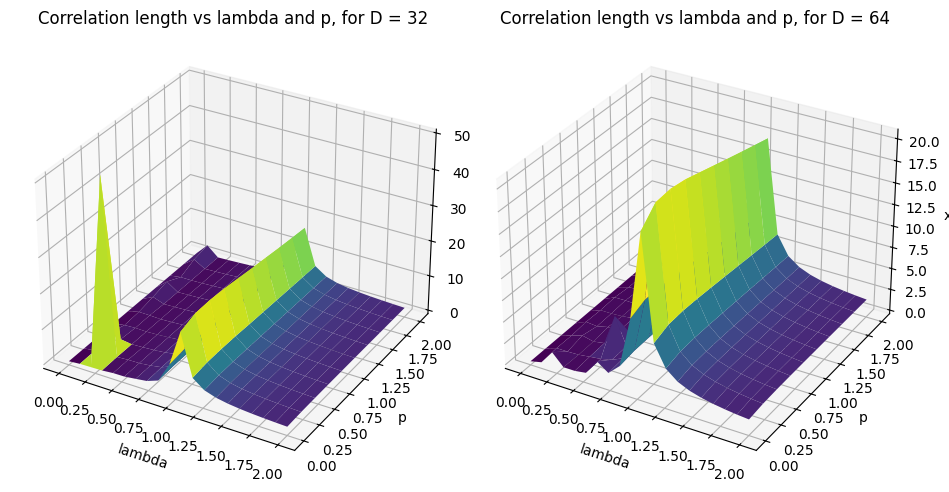

In [82]:
# Plot results with these sweep intervals:
ExtendedIsingModelSweeper.plot_sweep_vs_p_and_lambda(results_xi, "Correlation length", "xi", Ds, p_values, lmbd_values)

In [268]:
# Plot results with these sweep intervals:
Ds = [16, 32, 64]
p_values = np.linspace(0, 5, 10)
lmbd_values = np.linspace(0, 2, 20)
ExtendedIsingModelSweeper.plot_sweep_vs_p_and_lambda(results_x2i, "Correlation length", "xi", Ds, p_values, lmbd_values)

#### `P` and `lambda` from 0->2, with `D=2,4,8,16,32,64`:

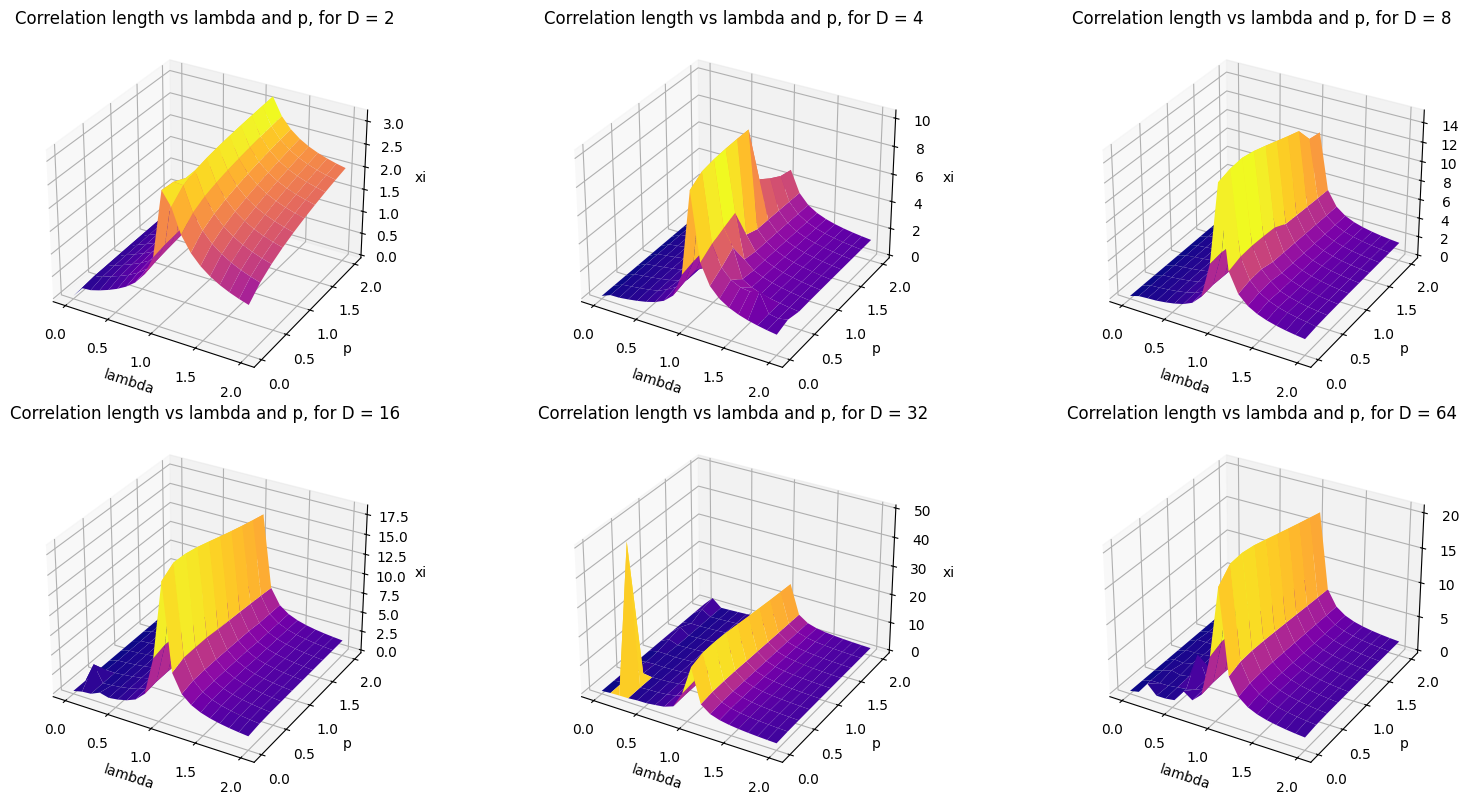

In [245]:
# Plot results with these sweep intervals:
Ds = [2, 4, 8, 16, 32, 64]
p_values = np.linspace(0, 2, 10)
lmbd_values = np.linspace(0, 2, 20)
ExtendedIsingModelSweeper.plot_sweep_vs_p_and_lambda(results_xi3, "Correlation length", "xi", Ds, p_values, lmbd_values)

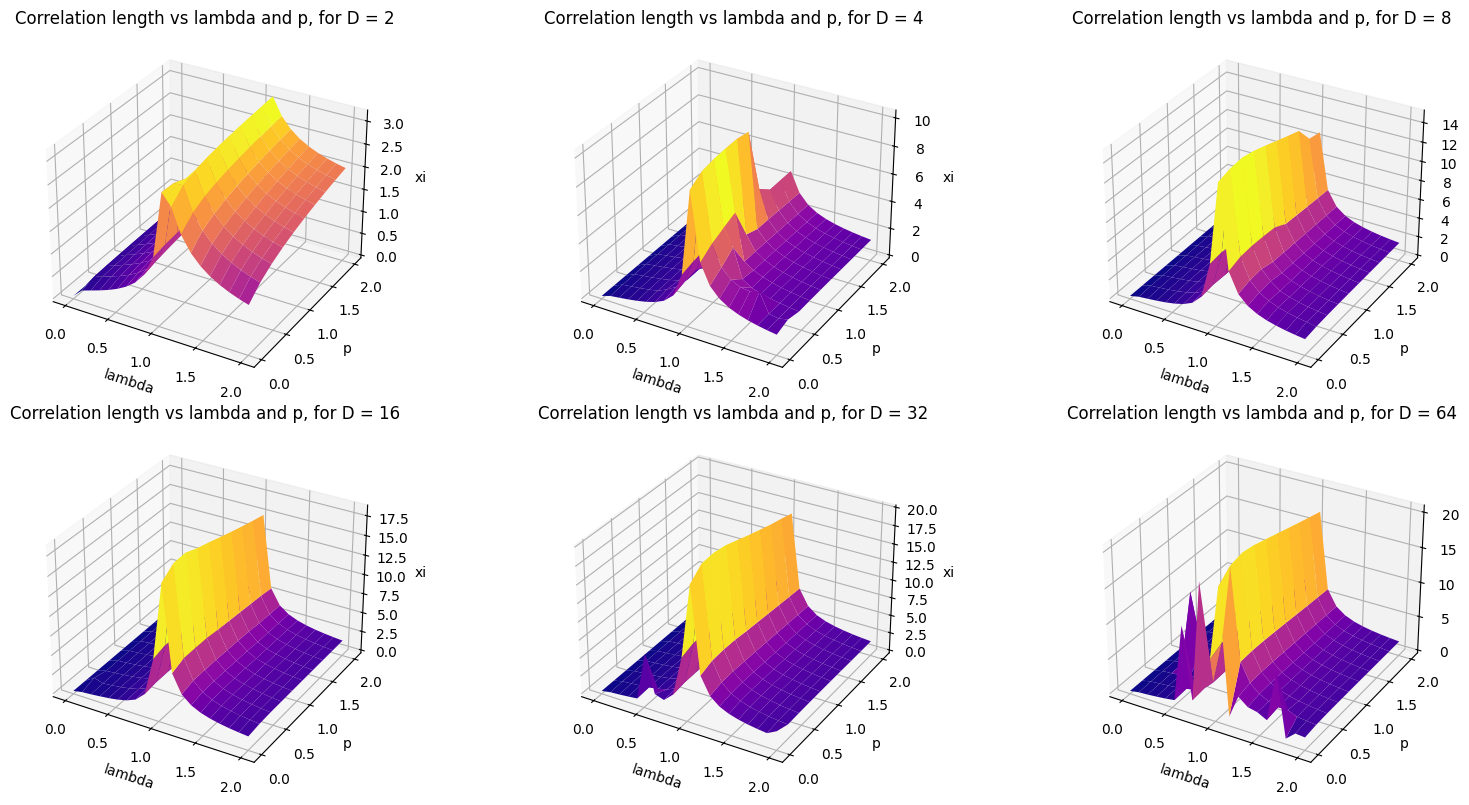

In [362]:
# Plot results with these sweep intervals:
Ds = [2, 4, 8, 16, 32, 64]
p_values = np.linspace(0, 2, 10)
lmbd_values = np.linspace(0, 2, 20)
ExtendedIsingModelSweeper.plot_sweep_vs_p_and_lambda(results_xi8, "Correlation length", "xi", Ds, p_values, lmbd_values)

#### Doing more Zoom around `lambda=1`, with better axis granularity for `D=32, 64`:

In [267]:
# Plot results with these sweep intervals:
Ds = [32, 64]
p_values = np.linspace(0, 1, 10)
lmbd_values = np.linspace(0.9, 1.1, 20)
ExtendedIsingModelSweeper.plot_sweep_vs_p_and_lambda(results_xi4, "Correlation length", "xi", Ds, p_values, lmbd_values)

#### Where its clear that in the center, `lambda ~ 1`, it keeps growing for bigger D, so smaller D's are not enough around such area.

#### **(c) Using $\xi\propto 1/\Delta$, discuss implications for the phase diagram.**


The relation:

$$\xi \propto \frac{1}{\Delta}$$
​
where $\Delta$ is the energy gap, is a key indicator of the physics. Concretely of two behaviours we can observe in our plots:

- **Gapped Phases:**
When the system is in a gapped phase, $\Delta>>0$. This implies a finite correlation length $\xi$. In these regions, all $D's>16$ should give consistent (and modest) values for $\xi$. From the plots, we can see that this is the case for `lambda`'s far from 1, regions with consistently small and converged $\xi$ for both bond dimensions.

- **Critical or Near-Critical Regions:**
At a quantum phase transition, the gap $\Delta$ closes (or becomes very small), and thus $\xi$ diverges. In practice, the iMPS approximation captures this as a very large correlation length. However, if $\xi$ is very large, a finite bond dimension $D$ imposes a cutoff (an effective finite correlation length due to entanglement truncation). Therefore, in the regions where the simulation results for different $D$'s differ significantly, this is a sign that the true correlation length (and thus the true vanishing gap) is not fully captured by the lower bond dimension. Such is the case of `lambda`'s close to 1 in our plots, areas where $\xi$ grows large and where the estimates are sensitive to $D$.

- **Summary of the Phase Diagram:**  In our model $H$, at `lambda=1` we will have a phase transition where the gap closes (or becomes very small).

### 3. **Extend simulations to larger bound dimensions $D\leq 64$** (1 point):

#### **(a) Identify regions where $\xi$ saturates with $D$ vs where it continues to grow.**

#### Post-process of results to only vizualize the `correlation lenght` vs `lambda` in a fixed `p`:
---

From the symmetry of the plot with `p` in the previous plots, we are only interested on seeing the behaviour vs `lambda`, so we can plot that for several `D`'s and compare:

In [293]:
# Plot results with these sweep intervals:
Ds = [2, 4, 8, 16, 32, 64]
p_values = np.linspace(0, 2, 10)
lmbd_values = np.linspace(0, 2, 20)

ExtendedIsingModelSweeper.plot_cut_at_fixed_p_vs_lambda(
    results_xi3, "Correlation length", "xi", Ds, p_values[4], lmbd_values, init_state="up"
)

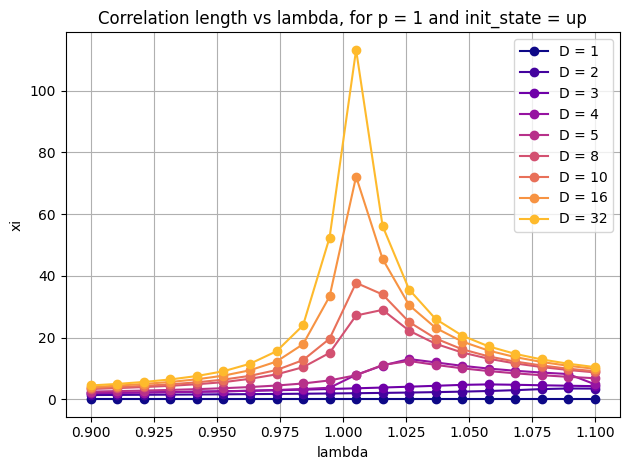

In [248]:
# Plot results with these sweep intervals:
Ds = [1, 2, 3, 4, 5, 8, 10, 16, 32]
p_values = [1]
lmbd_values = np.linspace(0.9, 1.1, 20)
init_state = "up"

ExtendedIsingModelSweeper.plot_cut_at_fixed_p_vs_lambda(
    results_xi5, "Correlation length", "xi", Ds, p_values[0], lmbd_values, init_state
)

In [216]:
# Plot results with these sweep intervals:
Ds = [1, 2, 3, 4, 5, 8, 10, 16, 32, 64]
p_values = [1]
lmbd_values = np.linspace(0.9, 1.1, 50)

ExtendedIsingModelSweeper.plot_cut_at_fixed_p_vs_lambda(
    results_xi6, "Correlation length", "xi", Ds, p_values[0], lmbd_values, init_state="plus"
)

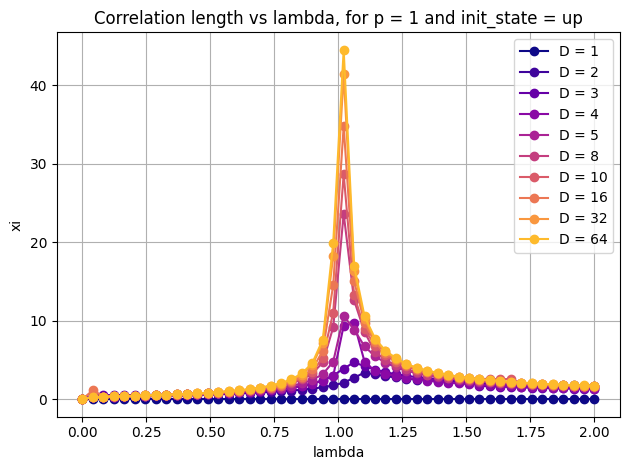

In [354]:
# Execute ploting the cut in p, and only showing dependeance in p, with the Sweep class:
Ds = [1, 2, 3, 4, 5, 8, 10, 16, 32, 64]
p_values = [1]
lmbd_values = np.linspace(0.0, 2.0, 50)

ExtendedIsingModelSweeper.plot_cut_at_fixed_p_vs_lambda(
    results_xi7, "Correlation length", "xi", Ds, p_values[0], lmbd_values, init_state="up"
)

#### We zoom on `lambda=1`, with better granularity of `lambda` and more `D`'s:

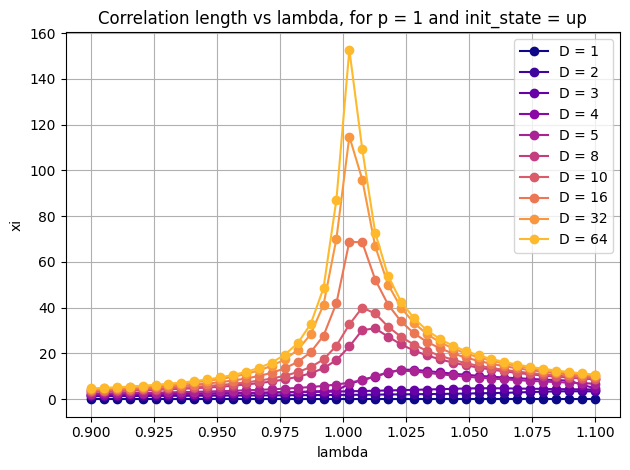

In [249]:
# Plot results with these sweep intervals:
Ds = [1, 2, 3, 4, 5, 8, 10, 16, 32, 64]
p_values = [1]
lmbd_values = np.linspace(0.9, 1.1, 40)

ExtendedIsingModelSweeper.plot_cut_at_fixed_p_vs_lambda(
    results_xi6, "Correlation length", "xi", Ds, p_values[0], lmbd_values, init_state="up"
)

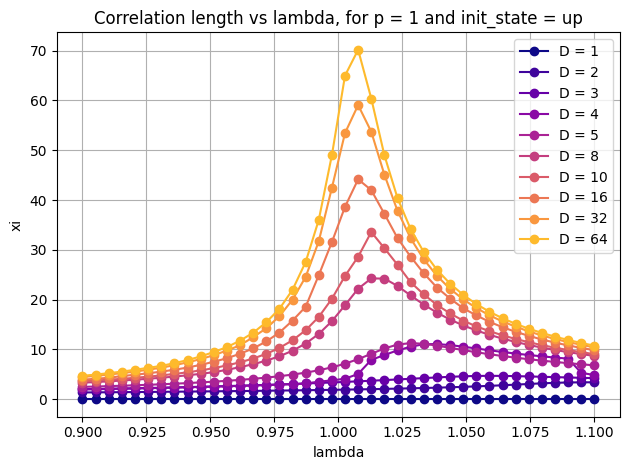

In [366]:
# Plot results with these sweep intervals:
Ds = [1, 2, 3, 4, 5, 8, 10, 16, 32, 64]
p_values = [1]
lmbd_values = np.linspace(0.9, 1.1, 40)

ExtendedIsingModelSweeper.plot_cut_at_fixed_p_vs_lambda(
    results_xi9, "Correlation length", "xi", Ds, p_values[0], lmbd_values, init_state="up"
)

In [323]:
# Plot results with these sweep intervals:
Ds = [1, 2, 3, 4, 5, 8, 10, 16, 32, 64]
p_values = [1]
lmbd_values = np.linspace(0.6, 1.4, 50)

ExtendedIsingModelSweeper.plot_cut_at_fixed_p_vs_lambda(
    results_xi6, "Correlation length", "xi", Ds, p_values[0], lmbd_values, init_state="up"
)

#### From where now its even more clear that for `lambda` close to 1, we need a higher `D`s, since it continues to grow. Instead for `lamda` far from it, the correlation saturates quickly. Meaning that we will have a phase transition for `lambda` $\approx$ `1`.

#### Another interesting point, is seeing how the critical `lambda` moves to the right, depending on `D`, reproducing the result in Fig.3 from [4]:

In [421]:
# Ploting critical lambda as a function of D:
Ds = [1, 2, 3, 4, 5, 8, 10, 16, 32, 64]
p_values = [1]
lmbd_values = np.linspace(0.9, 1.1, 40)


ExtendedIsingModelSweeper.plot_critical_lambda_vs_D_at_fixed_p(
    results_xi9, "Critical lambda* vs D", "lambda*", Ds, p_values[0], lmbd_values, init_state, color="purple"
)

#### **(b) Plot the half-chain entanglement entropy $S(\xi(D))$ vs $D$ and analyze its behaviour [4].**

#### Same Post-process of results, but this time to vizualize the half-chain entgl. entropy `S` vs `p` and `lambda`:
---

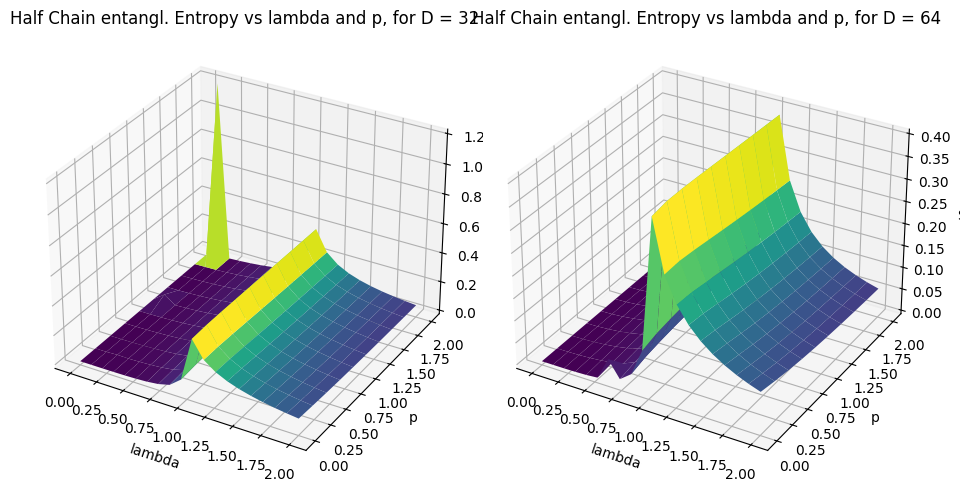

In [79]:
ExtendedIsingModelSweeper.plot_sweep_vs_p_and_lambda(
    results_S, "Half Chain entangl. Entropy", "S", Ds, p_values, lmbd_values
)

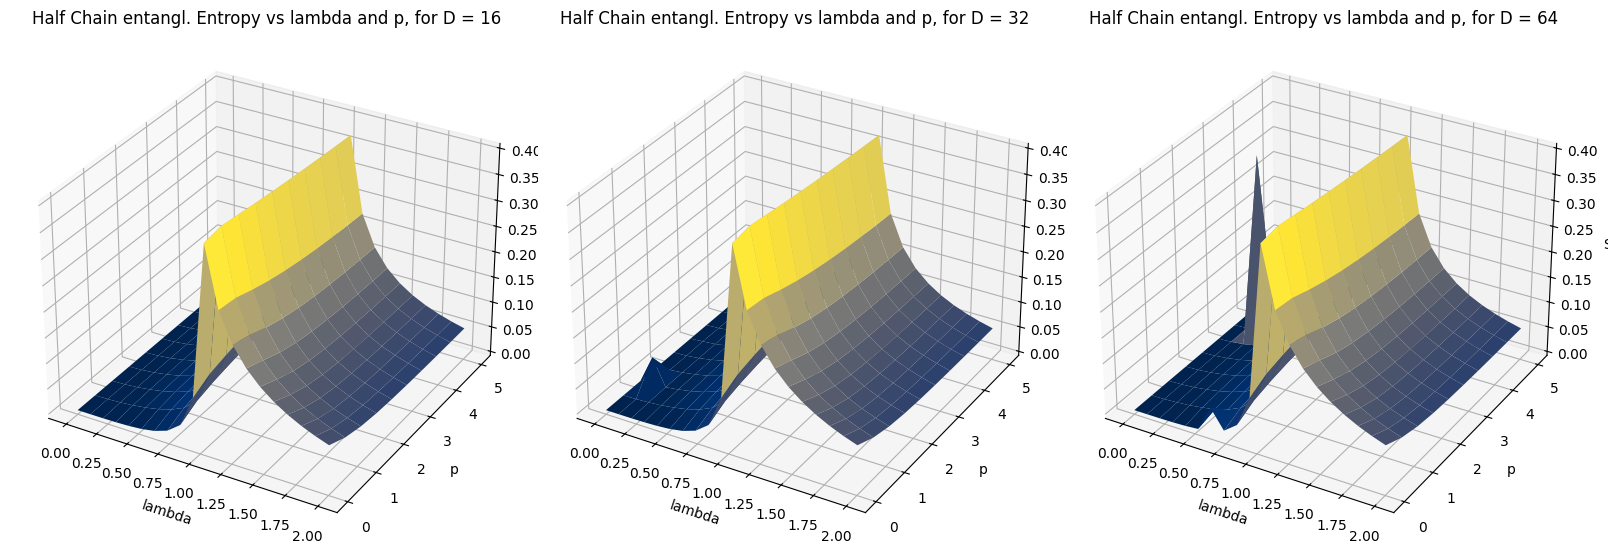

In [255]:
# Plot results with these sweep intervals:
Ds = [16, 32, 64]
p_values = np.linspace(0, 5, 10)
lmbd_values = np.linspace(0, 2, 20)
ExtendedIsingModelSweeper.plot_sweep_vs_p_and_lambda(
    results_S2, "Half Chain entangl. Entropy", "S", Ds, p_values, lmbd_values, "cividis"
)

In [256]:
# Plot results with these sweep intervals:
Ds = [2, 4, 8, 16, 32, 64]
p_values = np.linspace(0, 2, 10)
lmbd_values = np.linspace(0, 2, 20)
ExtendedIsingModelSweeper.plot_sweep_vs_p_and_lambda(
    results_S3, "Half Chain entangl. Entropy", "S", Ds, p_values, lmbd_values, "cividis"
)

#### `P` and `lambda` from 0->2, with `D=2,4,8,16,32,64`:

In [385]:
# Plot results with these sweep intervals:
Ds = [2, 4, 8, 16, 32, 64]
p_values = np.linspace(0, 2, 10)
lmbd_values = np.linspace(0, 2, 20)
ExtendedIsingModelSweeper.plot_sweep_vs_p_and_lambda(
    results_S8, "Half Chain entangl. Entropy", "S", Ds, p_values, lmbd_values, "cividis"
)

#### Doing more Zoom on `lambda=1`, with better granularity on the axis:

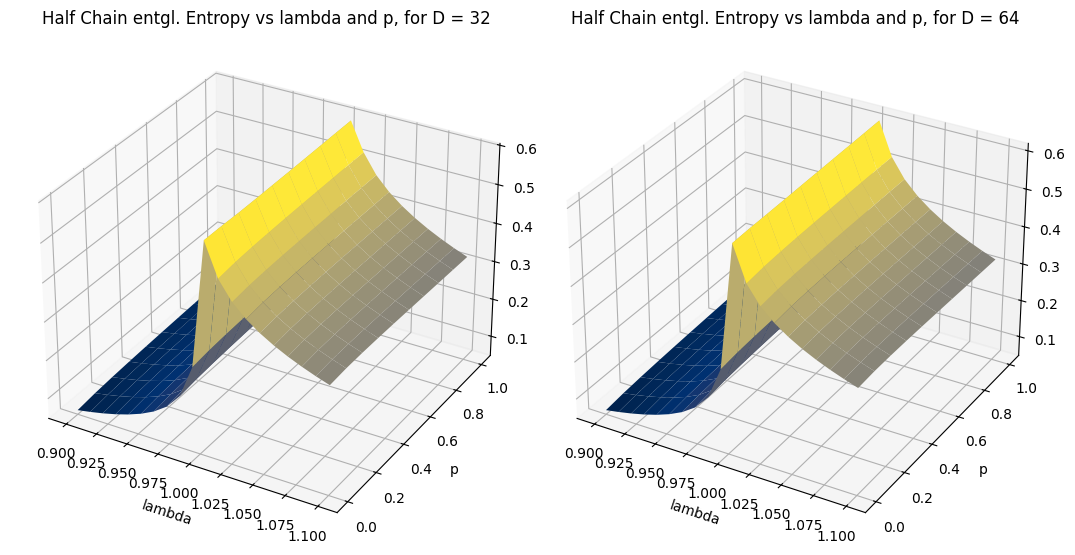

In [257]:
# Plot results with these sweep intervals:
Ds = [32, 64]
p_values = np.linspace(0, 1, 10)
lmbd_values = np.linspace(0.9, 1.1, 20)
ExtendedIsingModelSweeper.plot_sweep_vs_p_and_lambda(
    results_S4, "Half Chain entgl. Entropy", "S", Ds, p_values, lmbd_values, "cividis"
)

#### And now since we also observe a symmetry with respect to `p`, as in the previous 3. (a), we are going to plot cuts, showing only the dependance with `lambda`, for the different `D`'s, to see this behaviour better:

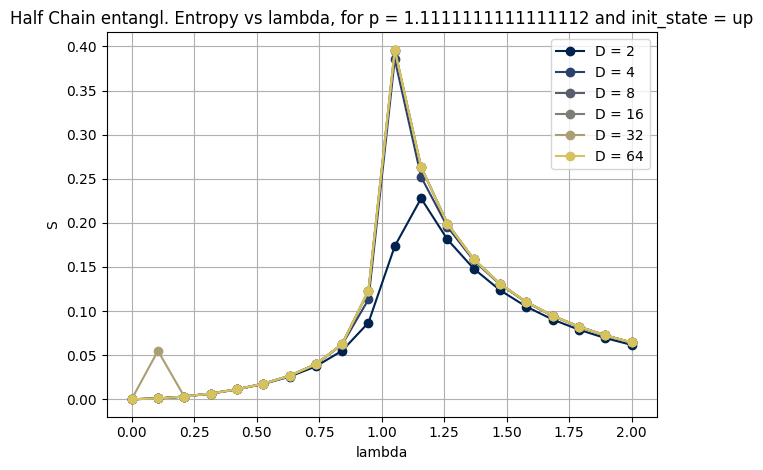

In [262]:
# Plot results with these sweep intervals:
Ds = [2, 4, 8, 16, 32, 64]
p_values = np.linspace(0, 2, 10)
lmbd_values = np.linspace(0, 2, 20)
ExtendedIsingModelSweeper.plot_cut_at_fixed_p_vs_lambda(
    results_S3, "Half Chain entangl. Entropy", "S", Ds, p_values[5], lmbd_values, init_state="up", color="cividis"
)

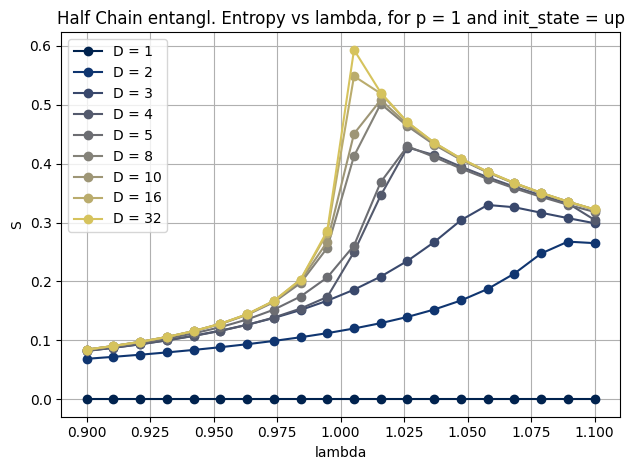

In [272]:
# Plot results with these sweep intervals:
Ds = [1, 2, 3, 4, 5, 8, 10, 16, 32]
p_values = [1]
lmbd_values = np.linspace(0.9, 1.1, 20)

ExtendedIsingModelSweeper.plot_cut_at_fixed_p_vs_lambda(
    results_S5, "Half Chain entangl. Entropy", "S", Ds, p_values[0], lmbd_values, init_state="up", color="cividis"
)

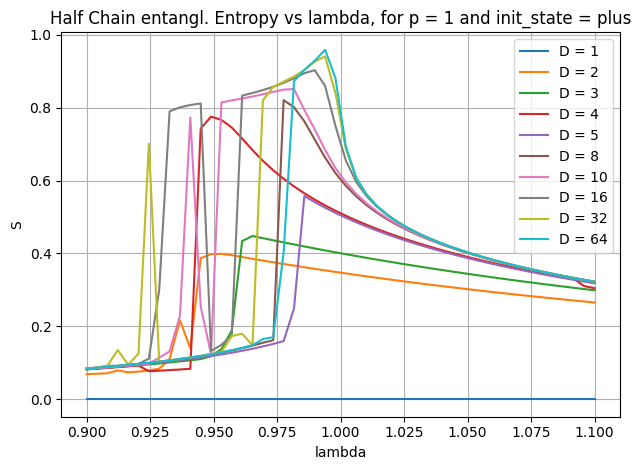

In [221]:
# Plot results with these sweep intervals:
Ds = [1, 2, 3, 4, 5, 8, 10, 16, 32, 64]
p_values = [1]
lmbd_values = np.linspace(0.9, 1.1, 50)
init_state = "plus"


ExtendedIsingModelSweeper.plot_cut_at_fixed_p_vs_lambda(
    results_S6, "Half Chain entangl. Entropy", "S", Ds, p_values[0], lmbd_values, init_state
)

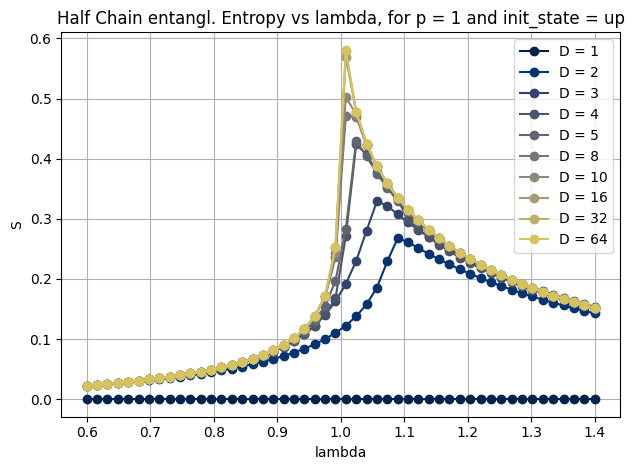

In [324]:
# Plot results with these sweep intervals:
Ds = [1, 2, 3, 4, 5, 8, 10, 16, 32, 64]
p_values = [1]
lmbd_values = np.linspace(0.6, 1.4, 50)
init_state = "up"


ExtendedIsingModelSweeper.plot_cut_at_fixed_p_vs_lambda(
    results_S6, "Half Chain entangl. Entropy", "S", Ds, p_values[0], lmbd_values, init_state, color="cividis"
)

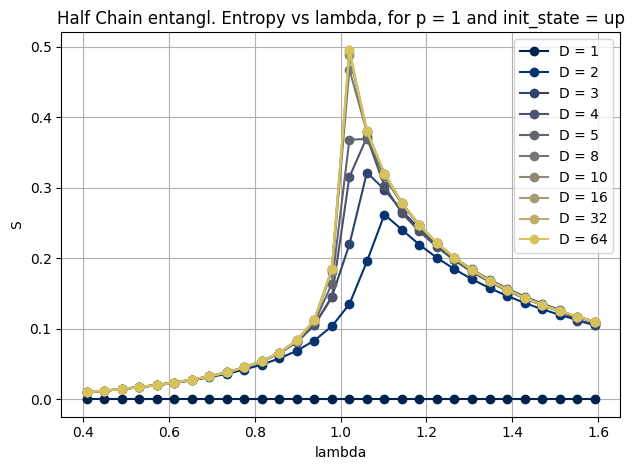

In [359]:
# Plot results with these sweep intervals:
Ds = [1, 2, 3, 4, 5, 8, 10, 16, 32, 64]
p_values = [1]
lmbd_values = np.linspace(0.0, 2.0, 50)[10:-10]


ExtendedIsingModelSweeper.plot_cut_at_fixed_p_vs_lambda(
    results_S7, "Half Chain entangl. Entropy", "S", Ds, p_values[0], lmbd_values, init_state, color="cividis"
)

#### Obtaining a very similar result to subfigure (a), from Fig. 2 in [4].

#### And zooming in, for a better granularity of the behaviour vs lambda, looks like:

In [264]:
# Plot results with these sweep intervals:
Ds = [1, 2, 3, 4, 5, 8, 10, 16, 32, 64]
p_values = [1]
lmbd_values = np.linspace(0.9, 1.1, 40)
init_state = "up"


ExtendedIsingModelSweeper.plot_cut_at_fixed_p_vs_lambda(
    results_S6, "Half Chain entangl. Entropy", "S", Ds, p_values[0], lmbd_values, init_state, color="cividis"
)

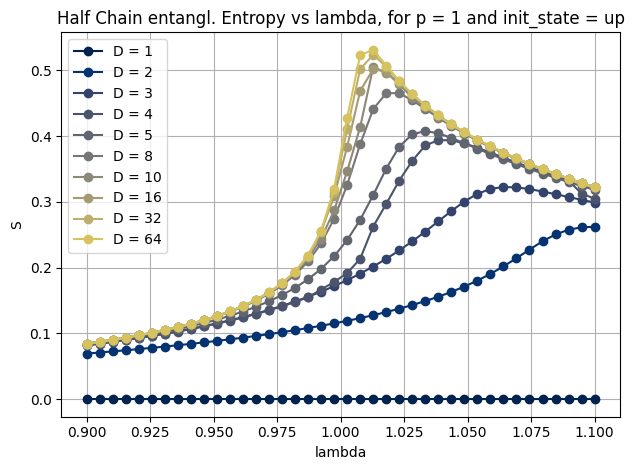

In [367]:
# Plot results with these sweep intervals:
Ds = [1, 2, 3, 4, 5, 8, 10, 16, 32, 64]
p_values = [1]
lmbd_values = np.linspace(0.9, 1.1, 40)


ExtendedIsingModelSweeper.plot_cut_at_fixed_p_vs_lambda(
    results_S9, "Half Chain entangl. Entropy", "S", Ds, p_values[0], lmbd_values, init_state, color="cividis"
)

From [4], we can infere that in critical regions, the finite-entanglement scaling theory predicts that the entanglement entropy is bounded by:
$$S = a + b \log D = c \log \xi + cont, $$
And since the finite bond dimension imposes an effective finite correlation length, one can expect:

- **Gapped Phases:** $S$ will quickly saturate with increasing $D$ because the true ground state has only limited entanglement.

- **Critical Phases:** $S$ will continue to grow (approximately logarithmically) with $D$. More precisely, since the effective $\xi$ grows with $D$ in a critical system, $S$ will also show a logarithmic dependence on $D$.



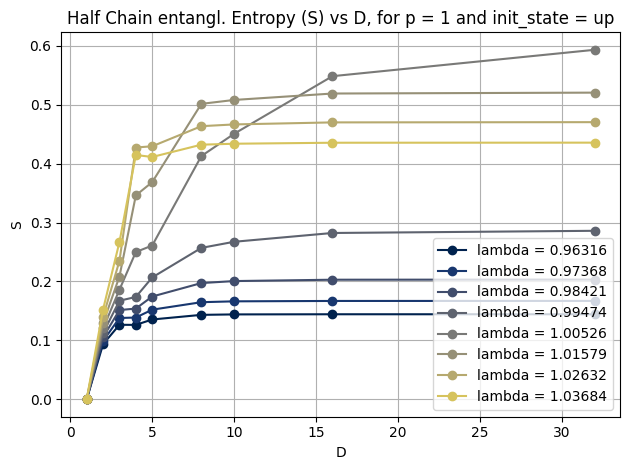

In [388]:
# Example of ploting results against D, for fixed p and lambda values, using the Sweeper class:
Ds = [1, 2, 3, 4, 5, 8, 10, 16, 32]
p_values = [1]
lmbd_values = np.linspace(0.9, 1.1, 20)[6:-6:1]


ExtendedIsingModelSweeper.plot_vs_D_at_fixed_p_and_lambdas(
    results_S5, "Half Chain entangl. Entropy (S) vs D", "S", Ds, p_values[0], lmbd_values, init_state, color="cividis"
)

#### Where clearly, for the `lambda` closer to 1, we got a logarithmic grow (Critical phase), while the gapped phases saturate faster into a const. Same results from Fig.1 in [4], but without an exponential axis of `D`, but a linear one here.

#### So for this case, the one that has not Plateaud (grey higher one), would need a higher `D`, for simulating it correctly.

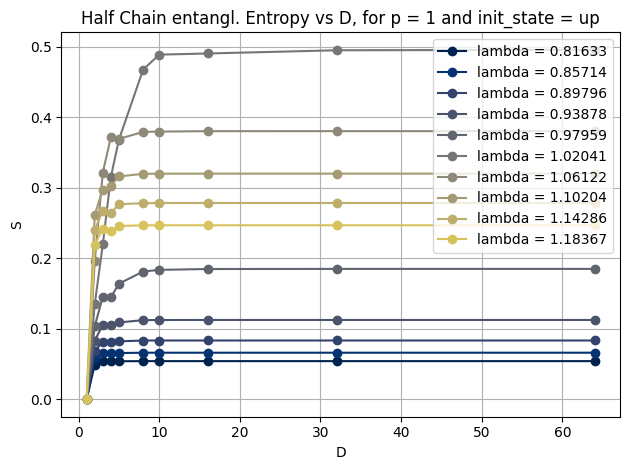

In [389]:
# Plot results with these sweep intervals:
Ds = [1, 2, 3, 4, 5, 8, 10, 16, 32, 64]
p_values = [1]
lmbd_values = np.linspace(0.0, 2.0, 50)[20:-20:1]


ExtendedIsingModelSweeper.plot_vs_D_at_fixed_p_and_lambdas(
    results_S7, "Half Chain entangl. Entropy vs D", "S", Ds, p_values[0], lmbd_values, init_state, color="cividis"
)

In [390]:
# Plot results with these sweep intervals:
Ds = [1, 2, 3, 4, 5, 8, 10, 16, 32, 64]
p_values = [1]
lmbd_values = np.linspace(0.9, 1.1, 40)[15:-15:1]


ExtendedIsingModelSweeper.plot_vs_D_at_fixed_p_and_lambdas(
    results_S9, "Half Chain entangl. Entropy vs D", "S", Ds, p_values[0], lmbd_values, init_state, color="cividis"
)

#### Further thoughts:
---

- In **gapped regions**, both $\xi$ and $S$ tend to saturate as $D$ increases.

- In **critical regions**, you expect to see:

    - $\xi$ increases significantly with $D$, reflecting the divergence of the true correlation length.

    - $S$ grows approximately as $\propto \frac{c}{6} \log \xi $. In practice, plotting $S$ versus $\log\xi$ should yield a straight line whose slope gives an estimate of the central charge $c$.

    - When you plot $S$ vs. $D$ if $S$ continues to increase (rather than plateauing), it is an indication that the bond dimension is still limiting the amount of entanglement captured and that the system is near a critical point.

#### This can also seen in this other plot, where we check the Correlation lenght `Xi` as a function of `D`, where for the critical `lambda`, should keep increasing for bigger `D`'s, while for the rest, should get bounded into a plato, since no more entanglement is needed:

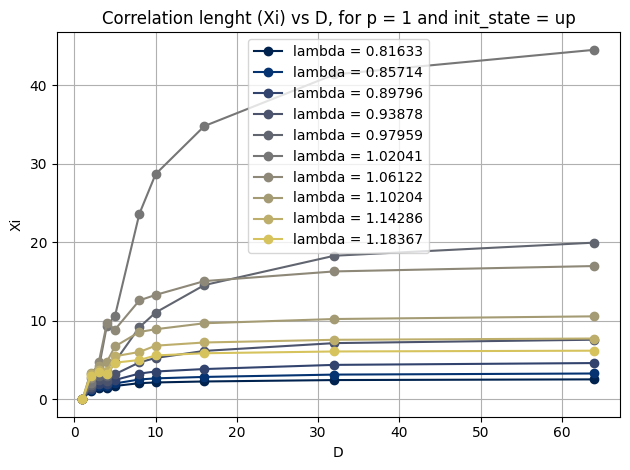

In [391]:
# # Plot results with these sweep intervals:
Ds = [1, 2, 3, 4, 5, 8, 10, 16, 32, 64]
p_values = [1]
lmbd_values = np.linspace(0.0, 2.0, 50)[20:-20:1]


ExtendedIsingModelSweeper.plot_vs_D_at_fixed_p_and_lambdas(
    results_xi7, "Correlation lenght (Xi) vs D", "Xi", Ds, p_values[0], lmbd_values, init_state, color="cividis"
)

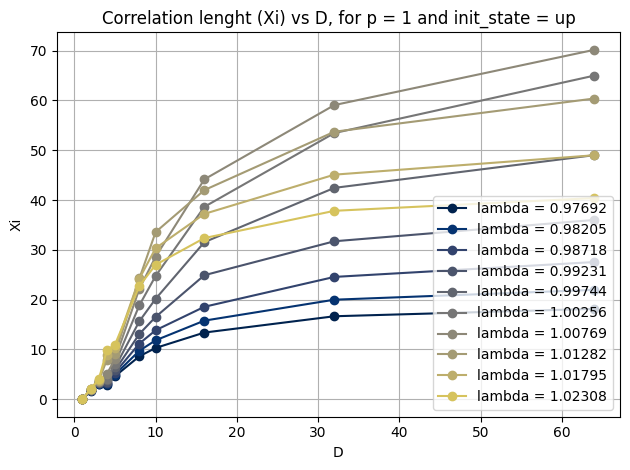

In [392]:
# # Plot results with these sweep intervals:
Ds = [1, 2, 3, 4, 5, 8, 10, 16, 32, 64]
p_values = [1]
lmbd_values = np.linspace(0.9, 1.1, 40)[15:-15:1]


ExtendedIsingModelSweeper.plot_vs_D_at_fixed_p_and_lambdas(
    results_xi9, "Correlation lenght (Xi) vs D", "Xi", Ds, p_values[0], lmbd_values, init_state, color="cividis"
)

#### where we can see how they all start similar to an exponential, since from Fig. 5 in [4] we expect $\xi \propto a D^k$. But as `D` increases then they start getting bounded, concretely the closer `lambda` is to the critical `lambda`, the later the bound starts (needing a higher correlation in the end).

---
---
---

## **III. Out-of-Equilibrium Dynamics (5 points)**
#### **Implement the quantum quench protocol using $TeMPy$**:


### 1. **Quench from a product state using (~~the iTEBD~~) an MPO time evolution algorithm**:

#### **(a) Initialize all spins in $|+\rangle$ state (along x-axis)**.


In [ ]:
model_params = {"L": 10, "S": 0.5, "p": 0.5, "lmbd": 1.0, "bc_MPS": "infinite", "conserve": None}
model = ExtendedIsingModel(model_params)

# Get an initial ansatz for the model:
state = model.get_plus_ansatz(init_state)


#### **(b) Evolve under the Hamiltonian $H$ with $p=0.5$ and $\lambda=1$ for time $t=5$, using a maximum bond dimension $D=100$.**


2. **Plot the following as functions of time** (0.5 pts each):
    
    (a) Magnetization $\langle\sigma^{x}\rangle(t)$

    (b) Magnetization $\langle\sigma^{z}\rangle(t)$

    (c) Explain the behaviour of $\langle\sigma^{z}\rangle$ using algebraic reasoning.

    (d) Entanglement entropy of half-chain

    (e) Bond dimension $D$

    (f) Truncation error $\epsilon$.

    (g) Discuss the relation between bond dimension growth, truncation error, and entanglement entropy

3. **Entanglement spectrum analysis** (1 point):

    (a) Compute the entanglement spectrum $e_{i}=-\log(\lambda_{i})$ where $\lambda_i$ are the eigenvalues of the reduced density matrix.
    
    (b) Define gaps $\Delta_{i}=e_{i}-e_{0}$ for the $10$ largest eigenvalues and plot both $\Delta_{i}$ and their ratios $\Delta_{i}/\Delta_{1}$ as functions of time.

4. **Discussion** (0.5 points): Summarize and interpret results [5].

## **IV. Summary**
This assignment aims to deepen your understanding of quantum phase transitions and non-equilibrium dynamics using tensor network methods. Key takeaways include:

- Identifying quantum phases via correlation length scaling.

- Observing entanglement growth in quench dynamics.
    
- Understanding computational limitations imposed by bond dimension and truncation errors


## References:

[1] F. C. Alcaraz, Phys. Rev. B **94**, 115116 (2016).

[2] J. Hauschild and F. Pollmann, SciPost Phys. Lect. Notes 005 (2018).

[3] J. Hauschild et al., $arXiv:2408.02010$ (2024).

[4] L. Tagliacozzo et al., Phys. Rev. B **78**, 024410 (2008).

[5] J. Surace et al., Phys. Rev. B **101**, 241107 (2020).
